In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
# Generate data with make_circles
np.random.seed(5)
X, y = make_circles(n_samples=500 ,factor=0.3 ,noise=0.1)

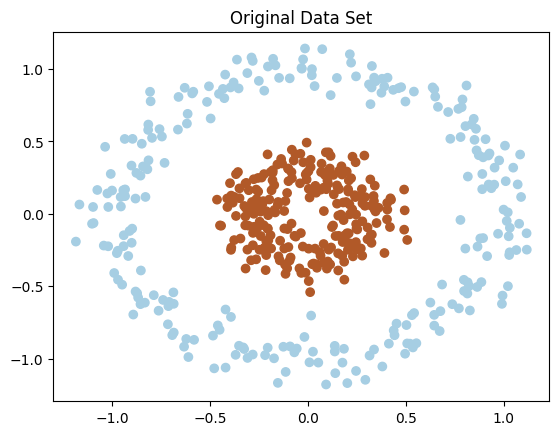

In [32]:
# Scatter plot of data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data Set")
plt.show()

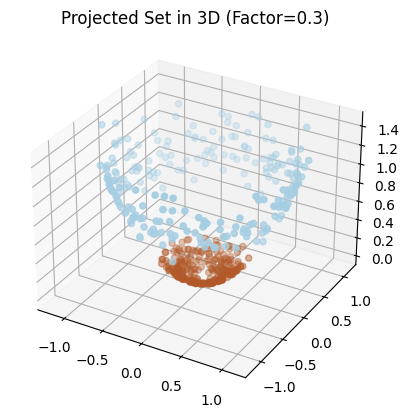

In [17]:
# Mapping 2D space to 3D space
# 3D feature space
X_projected = np.column_stack((X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2))

# Visualize the projected set
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_title("Projected Set in 3D (Factor=0.3)")
plt.show()


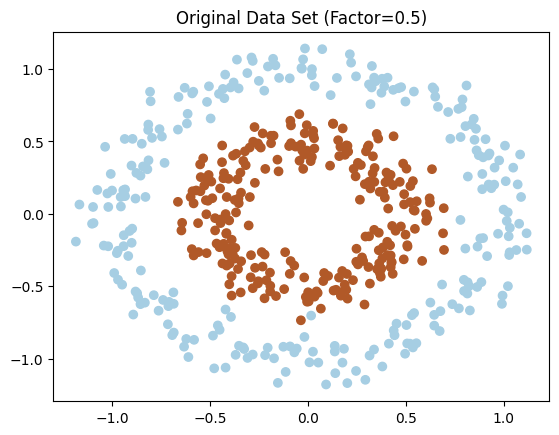

In [18]:
# Generate data with a different factor
np.random.seed(5)
X_new, y_new = make_circles(n_samples=500, factor=0.5, noise=0.1)
# Scatter plot of data points
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data Set (Factor=0.5)")
plt.show()

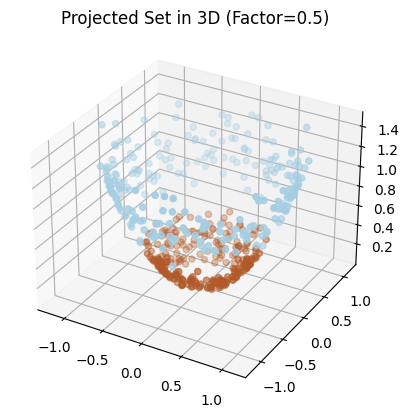

In [47]:
# Mapping 2D space to 3D space
# 3D feature space
X_projected_2 = np.column_stack((X_new[:, 0], X_new[:, 1], X_new[:, 0] ** 2 + X_new[:, 1] ** 2))

# Visualize the projected set
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected_2[:, 0], X_projected_2[:, 1], X_projected_2[:, 2], c=y, cmap=plt.cm.Paired)
ax.set_title("Projected Set in 3D (Factor=0.5)")
plt.show()


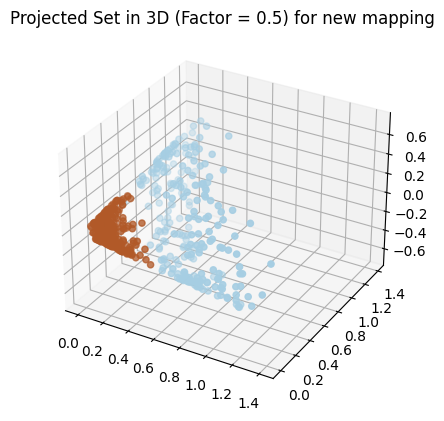

In [19]:
# Create the 3D feature space for new mapping
X_new_projected = np.column_stack((X_new[:, 0] ** 2, X_new[:, 1] ** 2, X_new[:, 0] * X_new[:, 1]))

# Visualize the projected set with a different factor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new_projected[:, 0], X_new_projected[:, 1], X_new_projected[:, 2], c=y_new, cmap=plt.cm.Paired)
ax.set_title("Projected Set in 3D (Factor = 0.5) for new mapping")
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Original dataset classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svc_original = SVC(kernel='linear')
svc_original.fit(X_train, y_train)
y_pred_original = svc_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

print("Original Dataset Accuracy:", accuracy_original)
print("Original Dataset Precision:", precision_original)
print("Original Dataset Recall:", recall_original)
print("Original Dataset F1 Score:", f1_original)


Original Dataset Accuracy: 0.6133333333333333
Original Dataset Precision: 0.5775862068965517
Original Dataset Recall: 0.881578947368421
Original Dataset F1 Score: 0.6979166666666666


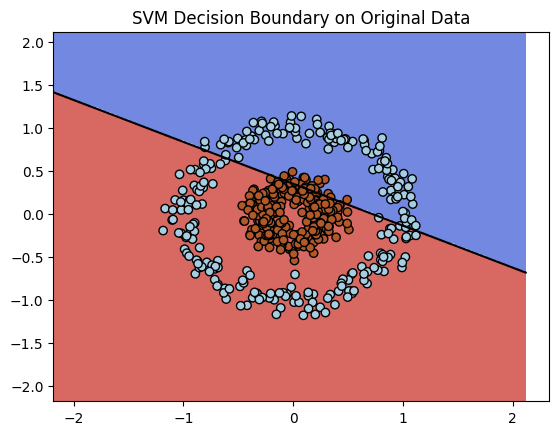

In [35]:
# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc_original.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary
w = svc_original.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (svc_original.intercept_[0]) / w[1]

# Plot the decision boundary
plt.plot(xx, yy, 'k-')

plt.title("SVM Decision Boundary on Original Data")
plt.show()

In [28]:
# Projected dataset classification
X_train_projected, X_test_projected, y_train_projected, y_test_projected = train_test_split(X_projected, y, test_size=0.3, random_state=42)
svc_projected = SVC(kernel='linear')
svc_projected.fit(X_train_projected, y_train_projected)
y_pred_projected = svc_projected.predict(X_test_projected)

accuracy_projected = accuracy_score(y_test_projected, y_pred_projected)
precision_projected = precision_score(y_test_projected, y_pred_projected)
recall_projected = recall_score(y_test_projected, y_pred_projected)
f1_projected = f1_score(y_test_projected, y_pred_projected)

print("Projected Dataset Accuracy:", accuracy_projected)
print("Projected Dataset Precision:", precision_projected)
print("Projected Dataset Recall:", recall_projected)
print("Projected Dataset F1 Score:", f1_projected)

Projected Dataset Accuracy: 1.0
Projected Dataset Precision: 1.0
Projected Dataset Recall: 1.0
Projected Dataset F1 Score: 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


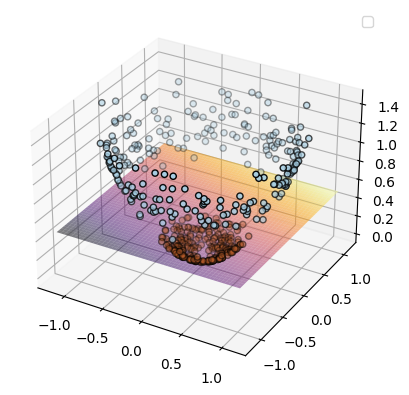

In [46]:
# Create a meshgrid to plot the decision boundary in 3D
xx_projected, yy_projected = np.meshgrid(np.linspace(X_projected[:, 0].min(), X_projected[:, 0].max(), 50),
                                         np.linspace(X_projected[:, 1].min(), X_projected[:, 1].max(), 50))
zz_projected = -(svc_projected.coef_[0][0] * xx_projected + svc_projected.coef_[0][1] * yy_projected + svc_projected.intercept_) / svc_projected.coef_[0][2]

# Plot the decision boundary in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx_projected, yy_projected, zz_projected, alpha=0.5, cmap='inferno')

# Plot the data points
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=y, cmap= plt.cm.Paired, edgecolors='k')

ax.legend()
plt.show()